In [1]:
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt
import json

In [2]:
path_data = r'E:\GitHub\AutoDoc\TestImages'

In [3]:
path_dataset_list = os.listdir(path_data) 

path_images = sorted([ os.path.join(path_data,path_image) for path_image in path_dataset_list if path_image.split('.')[-1] == 'JPG'], key = lambda a:a[:-5])
path_json =   sorted([os.path.join(path_data,path_json) for path_json in path_dataset_list if path_json.split('.')[-1] == 'json'], key = lambda a:a[:-5] )

In [4]:
# удаление потерянных файлов
path_json_ = [i[:-5] for i in path_json]
del_ = []
for i in range(len(path_json)):
    if not path_images[i] in path_json_:
        del_.append(path_images[i])

for path in del_:
    path_images.remove(path)

In [5]:
print(len(path_json))
print(len(path_images))

514
514


In [6]:
new_size = (256,512)

In [7]:
def get_list_from_dict( data: dict, size_img_old, size_img_new):
        result = []
        keys = data.keys()
        dx = size_img_old[0]/size_img_new[1]
        dy = size_img_old[1]/size_img_new[0]
        
        result.append([int(data['ul'][0]/dy),int(data['ul'][1]/dx)])
        result.append([int(data['ur'][0]/dy),int(data['ur'][1]/dx)])
        result.append([int(data['br'][0]/dy),int(data['br'][1]/dx)])
        result.append([int(data['bl'][0]/dy),int(data['bl'][1]/dx)])
        return result    

In [11]:
def get_point_in_json( path_json):
        point = []
        img = cv2.imread(path_json[:-5],cv2.IMREAD_GRAYSCALE)
        h,w = img.shape
        with open (path_json, 'r') as file:
            data = json.load(file)
            point = get_list_from_dict(data, (h,w), new_size)
        return point

In [8]:
def read_image(path): 
        x = cv2.imread(path)
        x = cv2.resize(x, new_size, cv2.INTER_CUBIC)
        return x 

In [37]:
def get_mask(points):
    new_size_ = (512, 256,3)
    back = np.zeros(new_size_,dtype=np.uint8)
    points_ = np.array(points, np.int32)
    
    mask = cv2.fillPoly(back, [points_], 255)
    return mask

In [27]:
points = get_point_in_json(r'E:\GitHub\AutoDoc\TestImages\IMG_3228.JPG.json')

In [33]:
points

[[21, 20], [232, 28], [235, 479], [15, 484]]

In [34]:
img = read_image(r'E:\GitHub\AutoDoc\TestImages\IMG_3228.JPG')

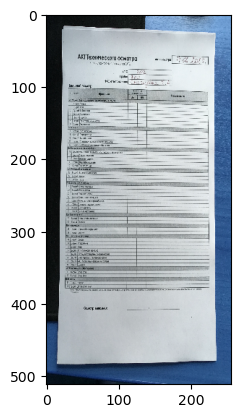

In [35]:
plt.imshow(img)

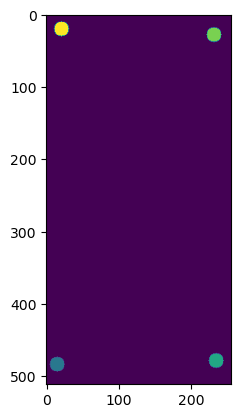

In [38]:
plt.imshow(get_mask(points))

In [19]:
path_save_images = r'E:\GitHub\AutoDoc\NN_2\DataSetGenerator\DataSet\images'
path_save_masks = r'E:\GitHub\AutoDoc\NN_2\DataSetGenerator\DataSet\masks'

In [20]:
import random

In [23]:
def rotate_image(point_center, image, angle):
    rotate = cv2.getRotationMatrix2D(point_center, angle, 1)
    image_rotate = cv2.warpAffine(image, rotate, (image.shape[1], image.shape[0]))

    return image_rotate

In [22]:
def aug_data(img_, mask_):
    img = img_.copy()
    mask = mask_.copy()
    h,w,_ = img_.shape
    center = (int(h/2), int(w/2))
    angle = random.uniform(-10,10)
    new_img = rotate_image(center, img, angle)
    new_mask = rotate_image(center, mask, angle)
    
    return new_img, new_mask

In [25]:
count = 0
for img_path, json_data in zip(path_images,path_json):
    img = read_image(img_path)
    points = get_point_in_json(json_data)
    mask = get_mask(points)
    
    cv2.imwrite(os.path.join(path_save_images,f'{count}_img.JPG'), img)
    cv2.imwrite(os.path.join(path_save_masks,f'{count}_mask.JPG'),mask)
    count+=1
    for _ in range(5):
        new_img, new_mask = aug_data(img,mask)
        cv2.imwrite(os.path.join(path_save_images,f'{count}_img.JPG'), new_img)
        cv2.imwrite(os.path.join(path_save_masks,f'{count}_mask.JPG'),new_mask)
        count+=1
    